In [1]:
# Importing Libraries

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset

pepsico=pd.read_csv(r"C:\Users\refoo\Downloads\1- datasets\Pepsico Products\pepsico_products.csv")
pepsico.sample(3)

,Product Name,Year Launched,Status,Region Served,Category,Ownership
90,Walkers Bugles,1966,Active,United Kingdom,Snack,PepsiCo (partial)
151,Looza Strawberry Banana,2021,Active,Belgium,Beverages,PepsiCo (partial)
138,SoBe Elixir,2005,Active,North America,Beverages,PepsiCo


In [3]:
# Product Name: Name of the product on markets.
# Year Launched: The year when the product was first introduced into the markets.
# Status: Is the product still in produce and sell or stopped.
# Region Served: The country or continent where the product is available.
# Category: The clasification of each product.
# Ownershipe: PepsiCo can be direct sole or partial owner (In case of partnership) and PepsiCo can be indirect owner of product through its subsidiaries.

In [4]:
# Ispecting duplicates

pepsico.duplicated().sum()

32

In [5]:
# Removing duplicates

pepsico.drop_duplicates(inplace=True)

In [6]:
pepsico['Status'].value_counts()

Active          154
Discontinued     37
Name: Status, dtype: int64

In [7]:
# let's make a pie chart for status column

Status=pepsico['Status'].value_counts().reset_index().sort_values('index')
Status.rename(columns = {"index": "Status", "Status": "Count"}, inplace = True)
Status.set_index('Status', inplace=True)
Status

,Count
Status,
Active,154
Discontinued,37


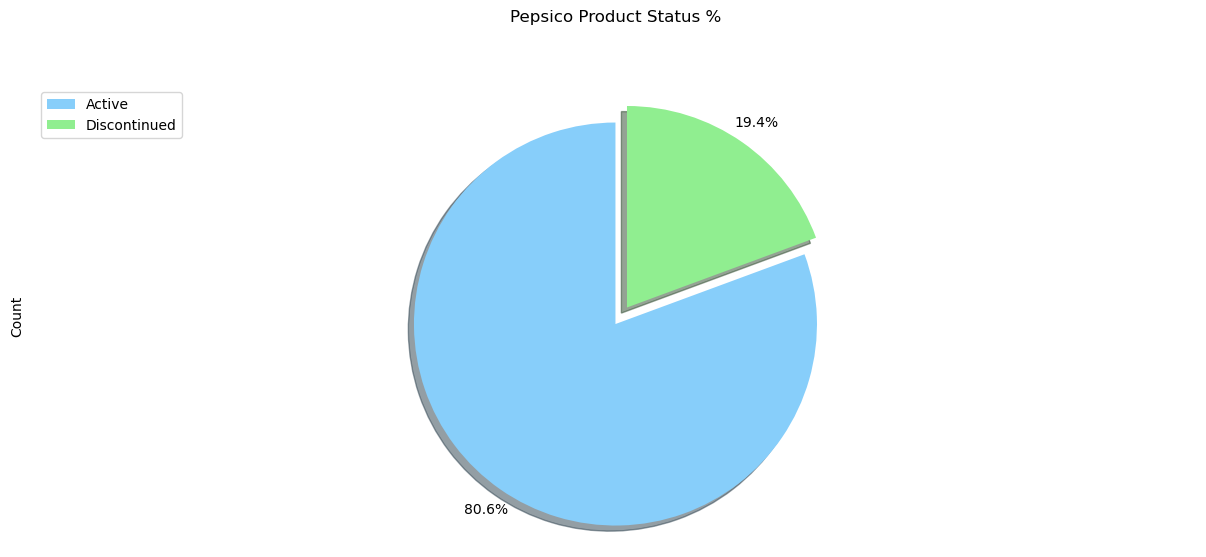

In [8]:
                                                    # Chart 1
                                        # A pie chart for Products status %
colors_list=['lightskyblue','lightgreen']
explode_list=[0.0,0.1]
Status['Count'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Pepsico Product Status %', y=1.12)
plt.axis('equal')
plt.legend(labels=Status.index, loc='upper left')
plt.show()

In [9]:
# Let's see product launch year distribution via a column chart

YLaunched=pepsico['Year Launched'].value_counts().reset_index().sort_values('index')
YLaunched.rename(columns = {"index": "Year_Launched", "Year Launched": "Count"}, inplace = True)
YLaunched.set_index('Year_Launched', inplace=True)
YLaunched.sample(3)

,Count
Year_Launched,
1980,1
1929,1
1940,2


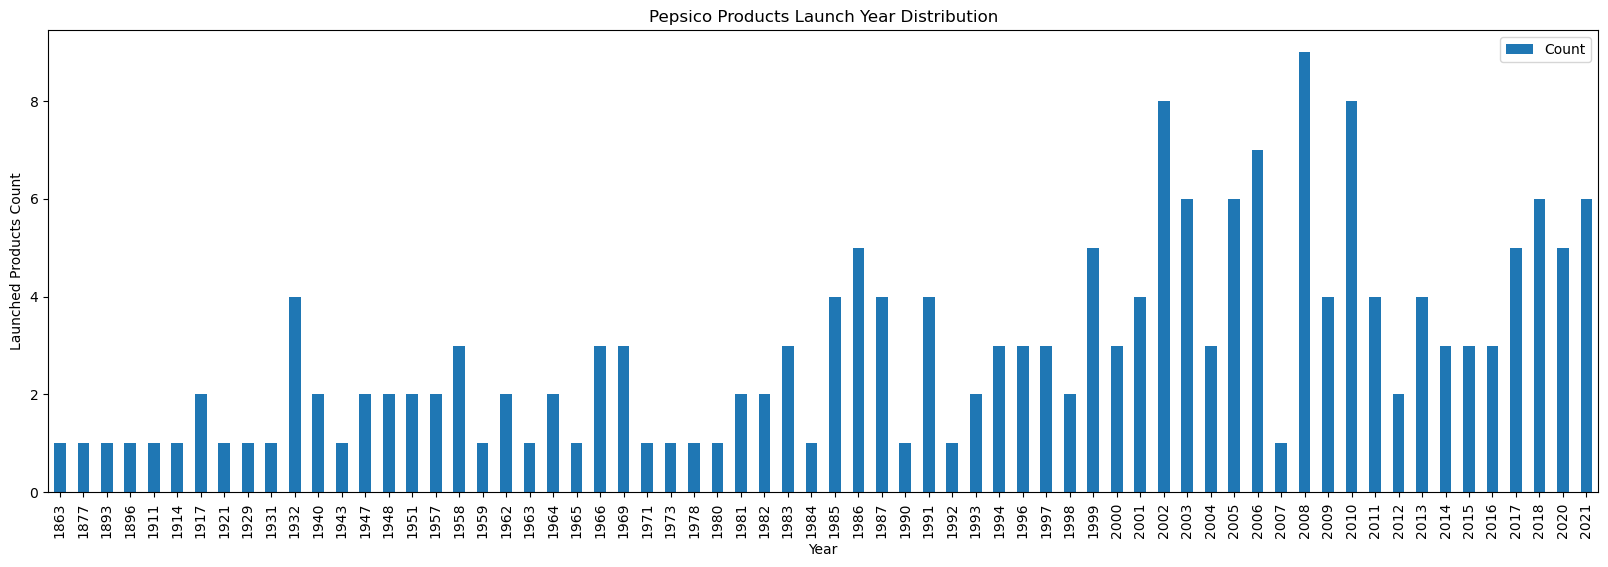

In [10]:
                                                    # Chart 2
                                        # A column chart for Product launch year

YLaunched.plot(kind='bar', figsize=(20,6))
plt.title('Pepsico Products Launch Year Distribution')
plt.xlabel('Year')
plt.ylabel('Launched Products Count')
plt.show()

In [11]:
# Now let's take a look on where the active products are distributed
# I will make a subset for active products only

active=pepsico[pepsico['Status'] == 'Active']
active.sample(3)

,Product Name,Year Launched,Status,Region Served,Category,Ownership
60,Tostitos,1981,Active,North America,Snack,Frito-Lay (PepsiCo)
76,Ruffles (Japan),1996,Active,Japan,Snack,PepsiCo (partial)
82,Miss Vickie's Kettle Cooked,1987,Active,North America,Snack,Frito-Lay (PepsiCo)


In [12]:
# 1- Distribution of cuntries served via bar chart

region_s=active['Region Served'].value_counts().reset_index().sort_values('Region Served')
region_s.rename(columns={'index':'Region','Region Served':'Count'}, inplace=True)
region_s.set_index('Region', inplace=True)
region_s.head(5)

,Count
Region,
United States (New Hampshire),1
United States (California),1
South Africa,1
Canada,1
Spain,2


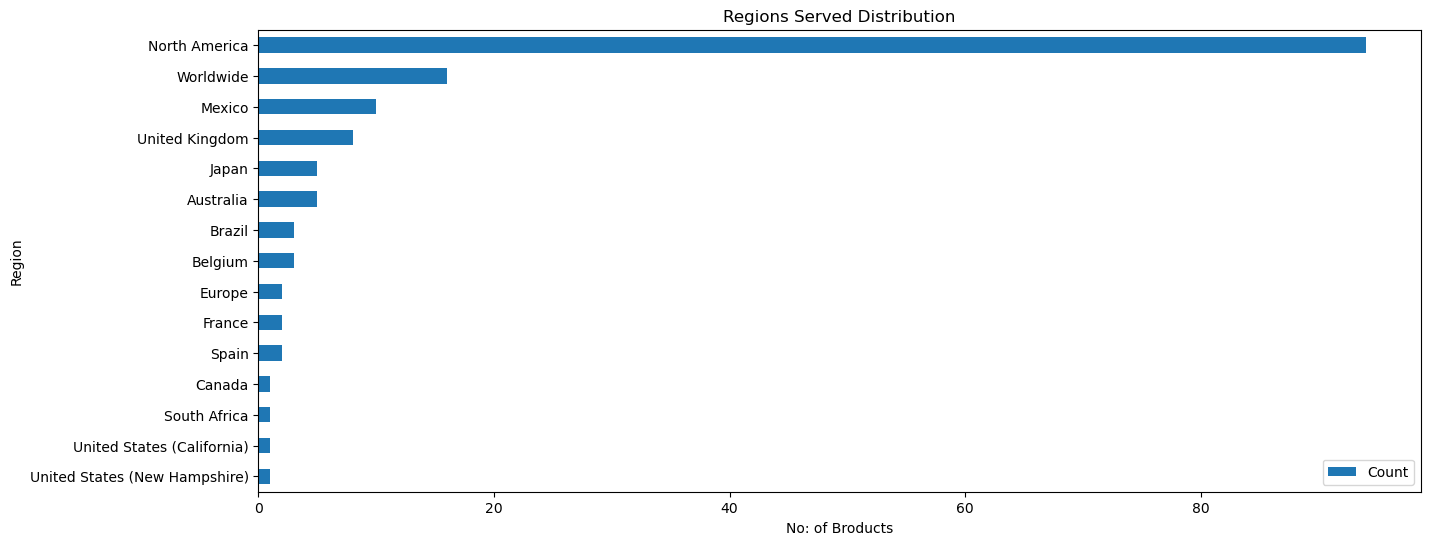

In [13]:
                                                    # Chart 3
                                        # A bar chart for distribution of active products

region_s.plot(kind='barh', figsize=(15,6))
plt.title('Regions Served Distribution')
plt.xlabel('No: of Broducts')
plt.ylabel('Region')
plt.show()

In [14]:
# Now i will make a pie chart to look at product distribution between different ownership.

ownership=active['Ownership'].value_counts().reset_index()
ownership.rename(columns={'index':'Owner', 'Ownership':'count'}, inplace=True)
ownership.set_index('Owner', inplace=True)
ownership

,count
Owner,
PepsiCo (partial),57
Frito-Lay (PepsiCo),42
PepsiCo,38
PepsiCo (partnership),8
Tropicana (PepsiCo),4
Sabritas (PepsiCo),2
Utz Quality Foods (PepsiCo),2
General Mills (PepsiCo),1


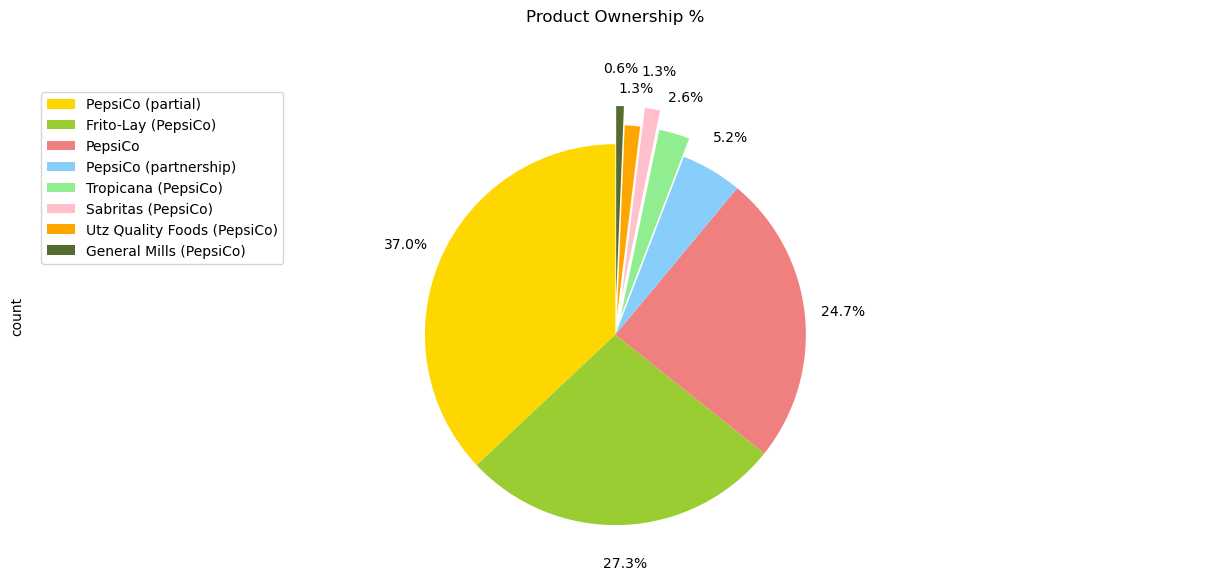

In [15]:
                                                    # Chart 4
                                        # A pie chart for Products ownership %

explode_list=[0.0,0.0,0.0,0.0,0.1,0.2,0.1,0.2]
colors_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','orange', 'darkolivegreen']
ownership['count'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, labels=None, colors=colors_list, pctdistance=1.2, explode=explode_list)
plt.title('Product Ownership %', y=1.12)
plt.axis('equal')
plt.legend(labels=ownership.index, loc='upper left')
plt.show()

In [16]:
# lets take the top 3 ownerships and look at how their products launch were distributed throughout the years.
# I will use a column chart and as the valuse of the Xlabel will be many, the columns will be thin, so i will devide it to two parts.

top3 = pd.concat([active, pd.get_dummies(active["Ownership"])], axis=1)
top3=top3.groupby("Year Launched").sum()[["PepsiCo (partial)", "Frito-Lay (PepsiCo)", "PepsiCo"]].sort_values("Year Launched").reset_index()
top3.set_index('Year Launched', inplace=True)
part1=top3.head(32)
part2=top3.tail(31)

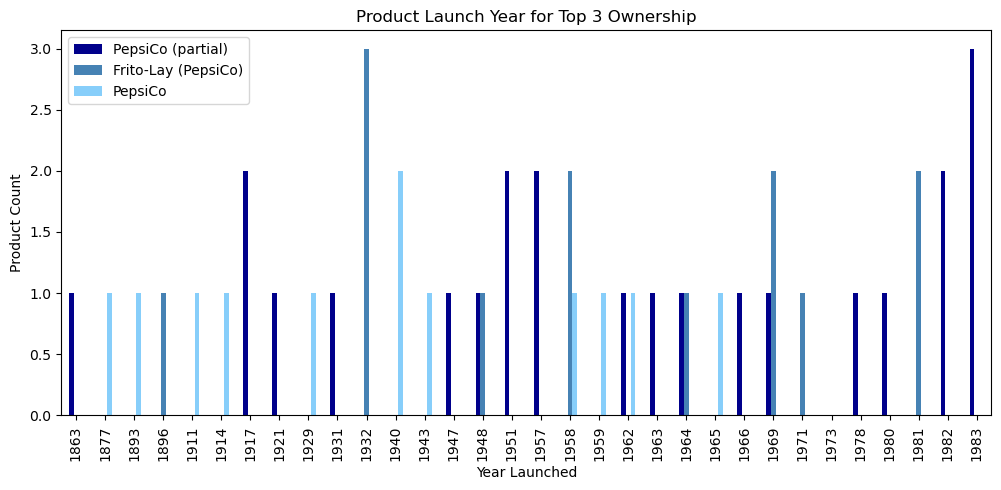

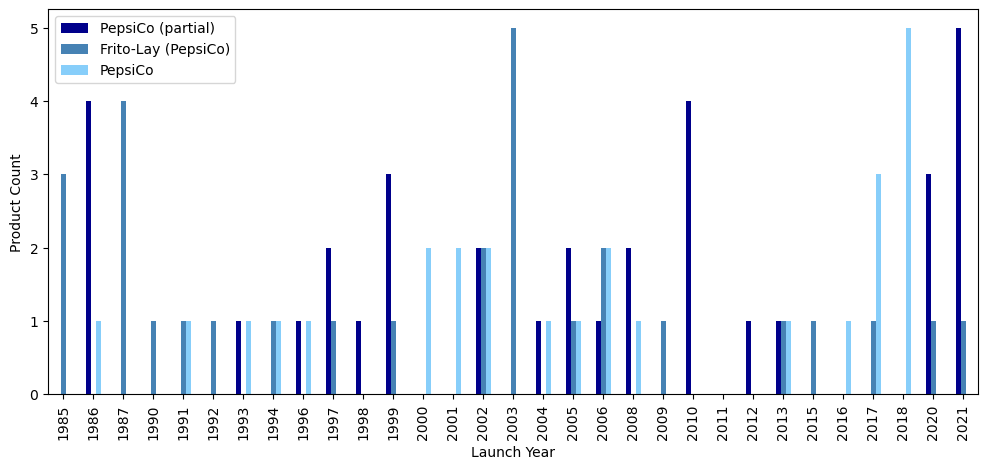

In [17]:
                                                    # Chart 5
                                        # A column chart of Product launch year for the top 3 ownership

colors_list=['darkblue','steelblue','lightskyblue']
part1.plot(kind='bar', figsize=(12,5), color=colors_list)
plt.title('Product Launch Year for Top 3 Ownership')
plt.ylabel('Product Count')
plt.show()


part2.plot(kind='bar', figsize=(12,5), color=colors_list)
plt.xlabel('Launch Year')
plt.ylabel('Product Count')
plt.show()

In [18]:
# lastly the number of products for each category

category=active['Category'].value_counts().reset_index()
category.rename(columns={'index':'Category', 'Category':'Count'}, inplace=True)
category.set_index('Category', inplace=True)
category.head(3)

,Count
Category,
Snack,80
Beverages,22
Food,8


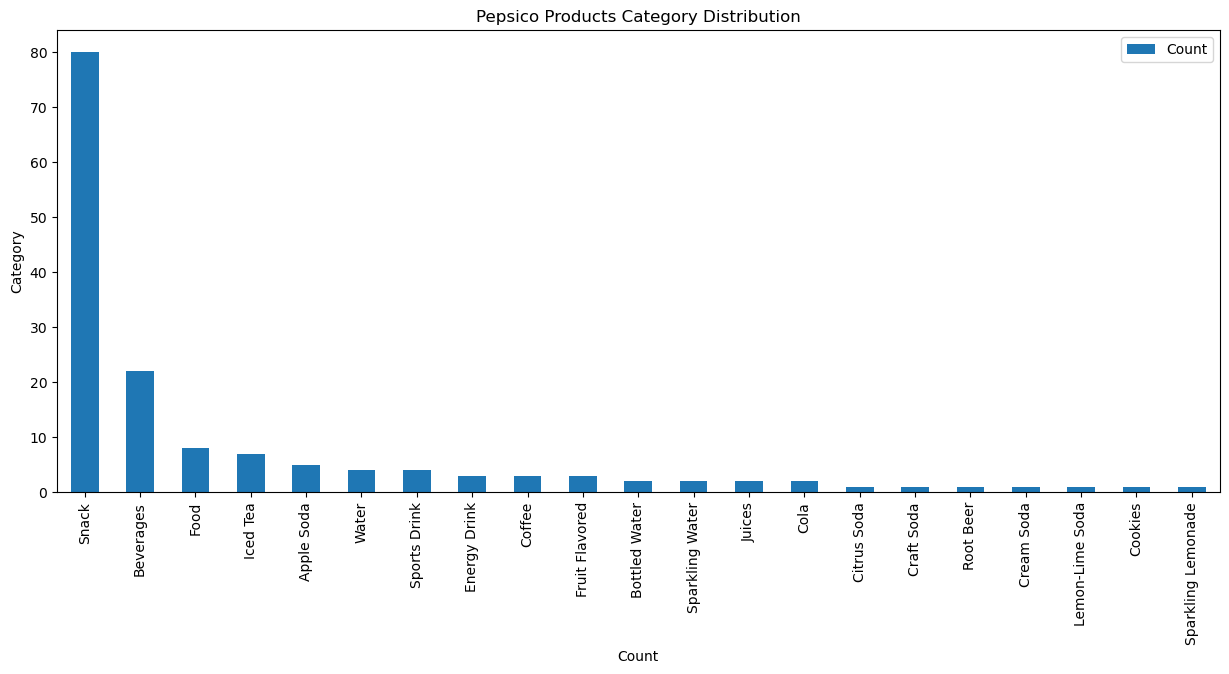

In [19]:
                                                    # Chart 6
                                        # A column chart for Product category distribution

category.plot(kind='bar', figsize=(15,6))
plt.title('Pepsico Products Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()